In [1]:
import pandas as pd
from numpy import percentile
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
def get_array_from_file(file_name):
    arr = []
    with open(file_name) as f:
        for l in f:
            arr.append(int(l))
    return np.asarray(arr)

In [3]:
def five_number_summary(lst):
    lst = np.asarray(lst)
    quartiles = percentile(lst, [25, 50, 75])
    # calculate min/max
    data_min, data_max, data_mean = lst.min(), lst.max(), lst.mean()
    # print 5-number summary
    print('Min: %.3f' % data_min)
    print('Q1: %.3f' % quartiles[0])
    print('Median: %.3f' % quartiles[1])
    print('Q3: %.3f' % quartiles[2])
    print('Max: %.3f' % data_max)
    print('Mean: %.3f' % data_mean)

In [4]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    print("The " + str(confidence *100) +"% confidence interval is between " +
          str(round(m-h, 3)) + " and " + str(round(m+h,3))+ ".")

In [5]:
def histogram(a, label):
    num_bins = 10
    n, bins, patches = plt.hist(a, num_bins, facecolor='blue', alpha=0.5)
    plt.xlabel('Final Score')
    plt.ylabel('Frequency')
    plt.title(label)
    plt.show()

Shortest Path:
Number of Runs: 186
Min: 5.000
Q1: 10.000
Median: 13.000
Q3: 17.000
Max: 31.000
Mean: 13.500
The 95.0% confidence interval is between 12.759 and 14.241.


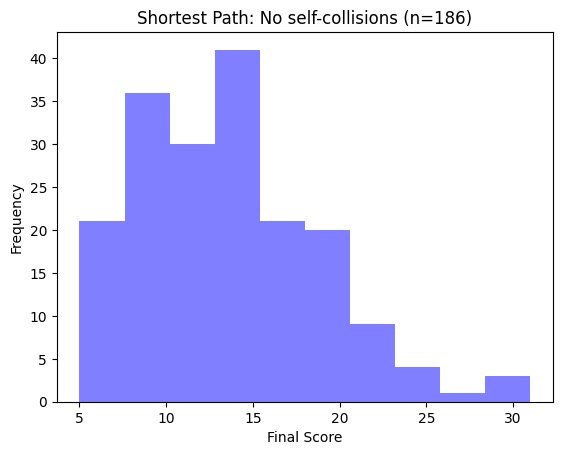


Better Shortest Path:
Number of Runs: 147
Min: 3.000
Q1: 17.000
Median: 28.000
Q3: 39.000
Max: 67.000
Mean: 28.415
The 95.0% confidence interval is between 25.992 and 30.837.


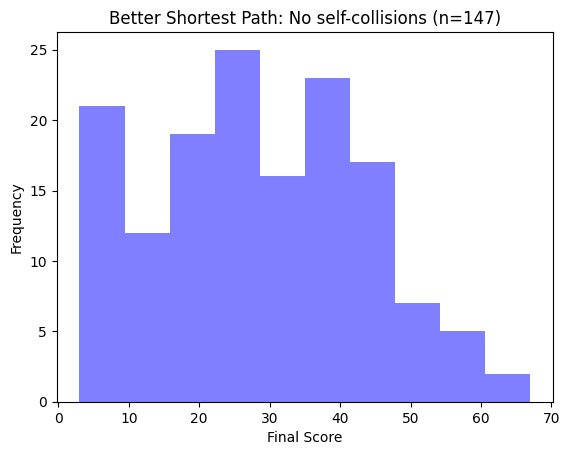

In [6]:
if __name__ == "__main__":
    shortest_data = get_array_from_file('shortest_lifetime_log.txt')
    better_shortest_data = get_array_from_file('better-shortest_lifetime_log.txt')

    print("Shortest Path:")
    print("Number of Runs: " + str(len(shortest_data)))
    five_number_summary(shortest_data)
    mean_confidence_interval(shortest_data)
    histogram(shortest_data, 'Shortest Path: No self-collisions (n=' + str(len(shortest_data)) + ')')

    print("\nBetter Shortest Path:")
    print("Number of Runs: " + str(len(better_shortest_data)))
    five_number_summary(better_shortest_data)
    mean_confidence_interval(better_shortest_data)
    histogram(better_shortest_data, 'Better Shortest Path: No self-collisions (n=' + str(len(better_shortest_data)) + ')')